# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [85]:
!pip install -r ../requirements.txt
!pip install plotly
!pip install seaborn


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 5.7 MB/s eta 0:00:000:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [108]:
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import seaborn as sns
import pickle

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [4]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df_raw['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

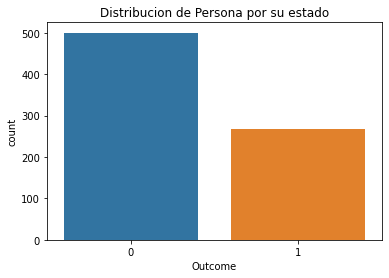

In [88]:
sns.countplot(x=df_raw['Outcome'])
plt.title('Distribucion de Persona por su estado')
plt.show()

In [79]:
fig = go.Figure()
for feature in list(df_raw.columns[0:7]):
    fig.add_trace(go.Violin(y=df_raw[feature],
        name=feature,
        box_visible=True,
        meanline_visible=True))

fig.show()

In [80]:
# Vamos a hacer una función para calcular la Entropia
def entropia(dato):
    counts = np.bincount(dato)
    porc = counts / len(dato)
    
    entropia = 0
    for pct in porc:
        if pct > 0:
            entropia += pct * np.log2(pct)
    return -entropia

In [81]:
X = df_raw.drop(columns=['Outcome'])
y = df_raw['Outcome']

In [82]:
# Vamos a calcular la entropia para este caso
print(f'Entropia: {np.round(entropia(y), 5)}')

Entropia: 0.93313


Al tener una entropia muy cerca de 1, estamos trabajando con datos que no son del todo puros

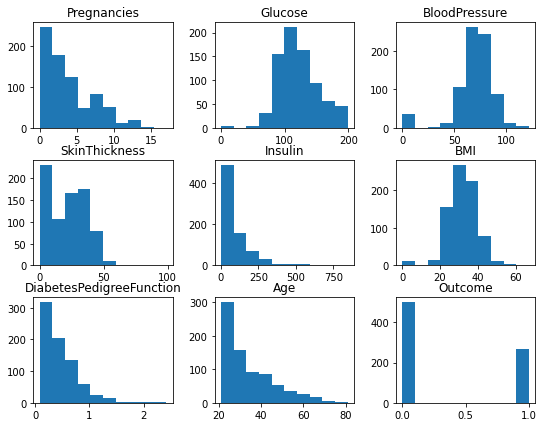

In [89]:
df_raw.hist(bins=10,figsize=(9,7),grid=False);
plt.show()

<AxesSubplot:>

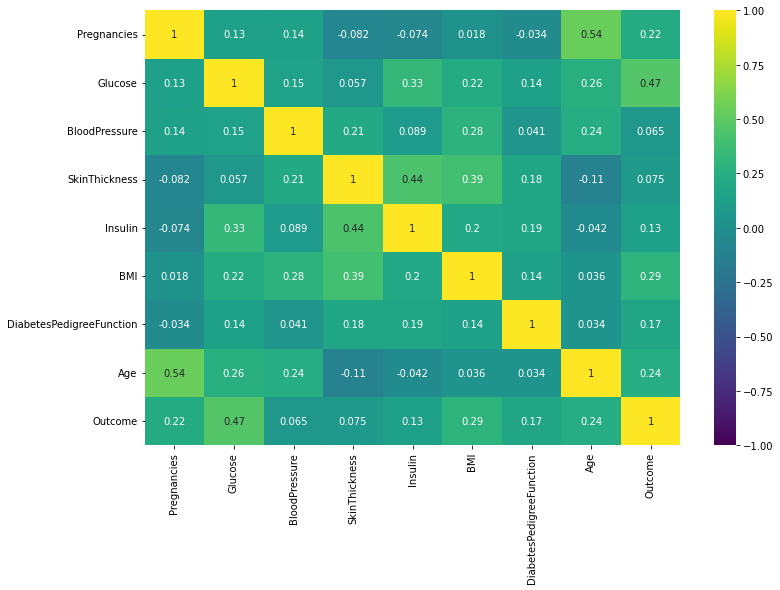

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

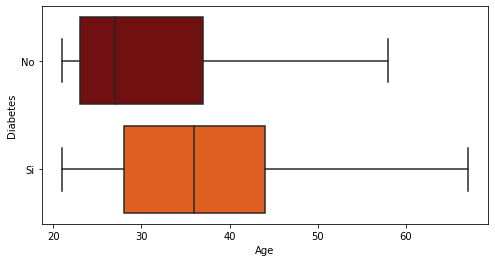

In [93]:
#Chequeo de correlación entre Outcome y Age

plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.Outcome, x = df_raw.Age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Diabetes')
plt.yticks([0,1], ['No','Si'])
plt.show()

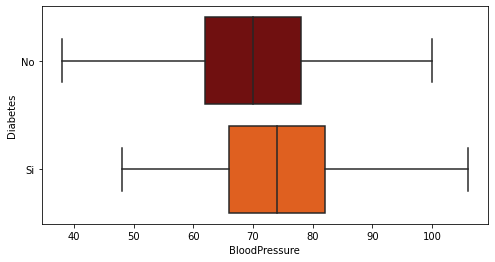

In [95]:
#Chequeo de correlación entre Outcome y BloodPressure

plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.Outcome, x = df_raw.BloodPressure, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Diabetes')
plt.yticks([0,1], ['No','Si'])
plt.show()

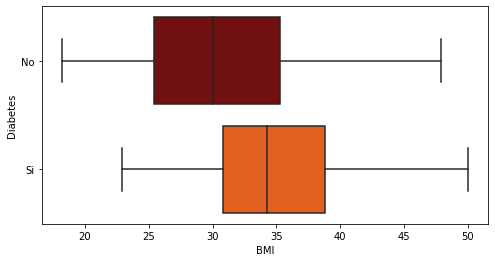

In [94]:
#Chequeo de correlación entre Outcome y BMI

plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.Outcome, x = df_raw.BMI, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Diabetes')
plt.yticks([0,1], ['No','Si'])
plt.show()

Text(0, 0.5, 'BMI')

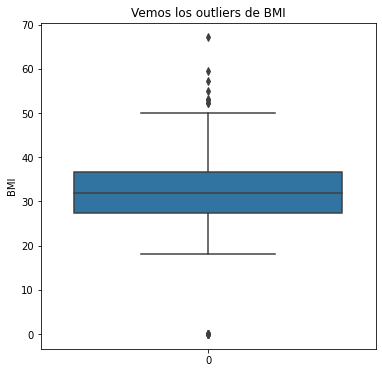

In [97]:
#Vemos los outliers de la variable BMI
plt.figure(figsize=(6,6))
sns.boxplot(data=df_raw['BMI'])
plt.title('Vemos los outliers de BMI')
plt.ylabel('BMI')

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=121)

In [51]:
clf = DecisionTreeClassifier(random_state=121, max_depth=5)

In [52]:
clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5, random_state=121)

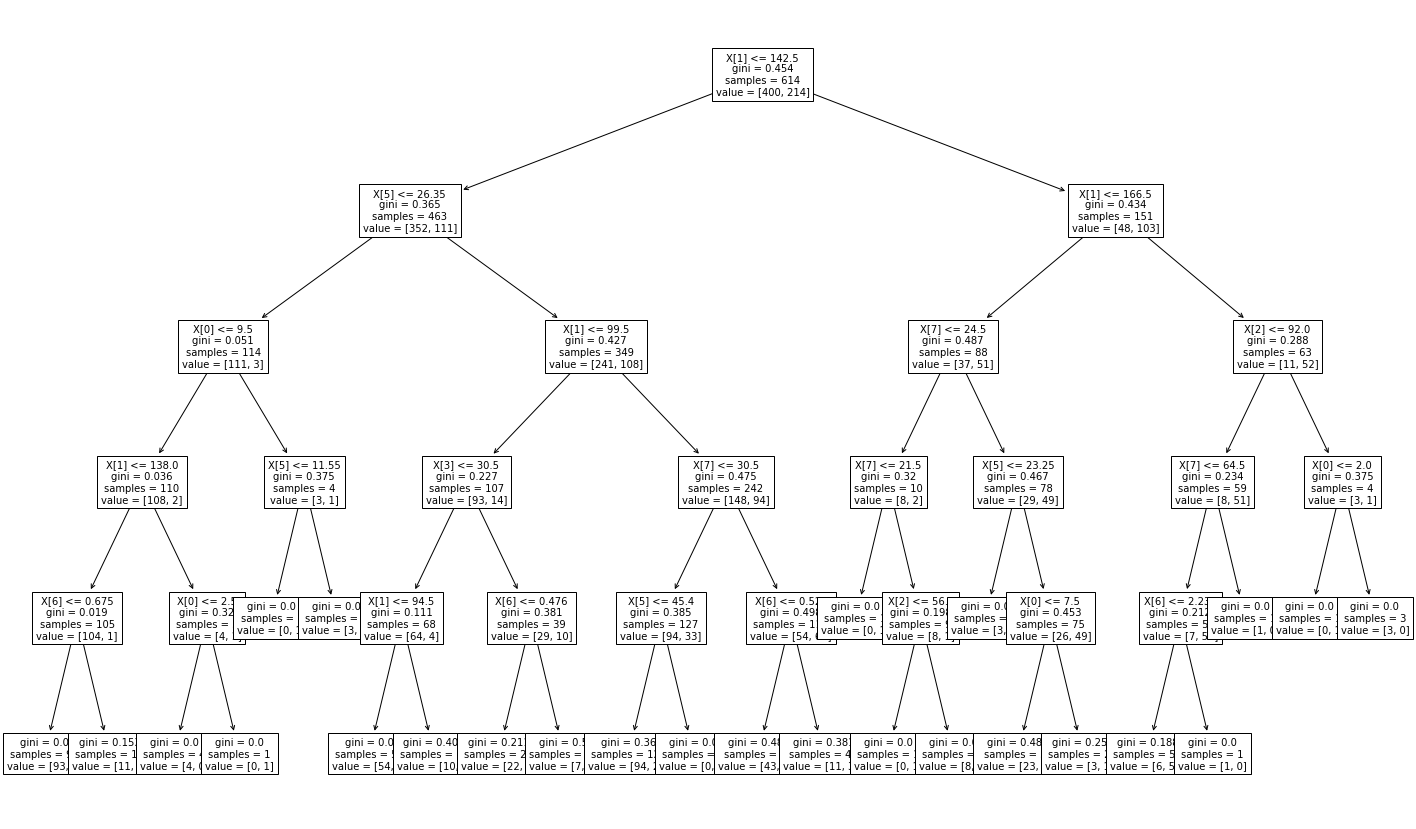

In [53]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(clf,fontsize=10)
plt.show()

In [54]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [55]:
target_names = ['Negativo', 'Positivo']
print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negativo       0.83      0.89      0.86       400
    Positivo       0.77      0.66      0.71       214

    accuracy                           0.81       614
   macro avg       0.80      0.78      0.78       614
weighted avg       0.81      0.81      0.81       614



In [56]:
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negativo       0.76      0.92      0.83       100
    Positivo       0.76      0.46      0.57        54

    accuracy                           0.76       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.76      0.76      0.74       154



In [57]:
clf = DecisionTreeClassifier(random_state=121, max_depth=5,class_weight={0:0.2,1:0.8})

In [58]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       random_state=121)

In [59]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [60]:
print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negativo       0.94      0.66      0.78       400
    Positivo       0.59      0.92      0.72       214

    accuracy                           0.75       614
   macro avg       0.77      0.79      0.75       614
weighted avg       0.82      0.75      0.76       614



In [61]:
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negativo       0.93      0.76      0.84       100
    Positivo       0.67      0.89      0.76        54

    accuracy                           0.81       154
   macro avg       0.80      0.82      0.80       154
weighted avg       0.84      0.81      0.81       154



In [67]:
# Probamos ahora modificando el max_depth pasamos de 5 a 7
clf = DecisionTreeClassifier(random_state=121, max_depth=7,class_weight={0:0.3,1:0.7})

In [63]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=7,
                       random_state=121)

In [64]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [65]:
print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negativo       0.96      0.83      0.89       400
    Positivo       0.75      0.93      0.83       214

    accuracy                           0.86       614
   macro avg       0.85      0.88      0.86       614
weighted avg       0.88      0.86      0.87       614



In [66]:
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negativo       0.86      0.84      0.85       100
    Positivo       0.71      0.74      0.73        54

    accuracy                           0.81       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



In [99]:
# Ahora aplicamos una formula para encontrar los mejores valores del arbol

accuracies = list()
nro_feature = X_train.columns.size
depth_range = range(1, nro_feature+1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             random_state=121)
    tree_model.fit(X_train, y_train)
    accuracies.append(tree_model.score(X_test, y_test))
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.772727
         2          0.772727
         3          0.792208
         4          0.785714
         5          0.766234
         6          0.772727
         7          0.772727
         8          0.792208


In [100]:
# Elegimos el que mejor nos dio en esta caso hay dos iguales 3 y 8, vamos a seleccionar el 3

clf = DecisionTreeClassifier(criterion='entropy',
                             min_samples_split=20,
                             min_samples_leaf=5,
                             random_state=0, max_depth=3)

clf.fit(X_train, y_train)
print('Accuracy:',clf.score(X_test, y_test))

Accuracy: 0.7922077922077922


In [102]:
#show predicted dataset
clf_pred=clf.predict(X_test)

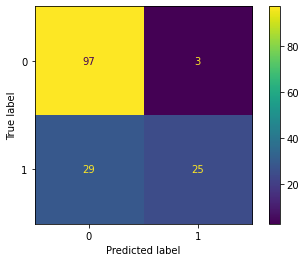

In [105]:
cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()

In [112]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [113]:
print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negativo       0.76      0.90      0.82       400
    Positivo       0.72      0.47      0.57       214

    accuracy                           0.75       614
   macro avg       0.74      0.69      0.70       614
weighted avg       0.75      0.75      0.74       614



In [114]:
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negativo       0.77      0.97      0.86       100
    Positivo       0.89      0.46      0.61        54

    accuracy                           0.79       154
   macro avg       0.83      0.72      0.73       154
weighted avg       0.81      0.79      0.77       154



De esta forma vemos que mejoraron los resultados obtenidos, por lo cual pasamos a grabar nuestro set de entrenamiento

In [109]:
pickle.dump(clf, open('../models/decision_tree.pkl', 'wb'))

In [110]:
# Si queremos cargar el archivo guardado en la carpeta models

load_model = pickle.load(open('../models/decision_tree.pkl', 'rb'))

In [111]:
load_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=20, random_state=0)